In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("PlayTennis.csv")
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


#### problem statement:according to weather we need to predict whether he could play tennis or not

## convering the categorical into numerical

In [3]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for col in data.columns:
    data[col]=Le.fit_transform(data[col])
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [17]:
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [19]:
X=data.iloc[:,[0,3]].values
Y=data.iloc[:,-1].values

## VIS DATA

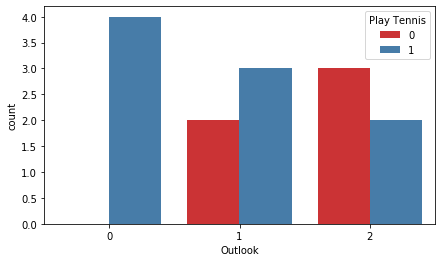

In [20]:
plt.figure(figsize=(7,4))
sns.countplot(x='Outlook',hue='Play Tennis',data=data,palette='Set1')
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
MM=MinMaxScaler()
X=MM.fit_transform(X)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param= {'n_neighbors': np.arange(1,7),'weights':['uniform','distance']}
GS= GridSearchCV(knn,param, cv=2,scoring='roc_auc')
GS.fit(X,Y)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [27]:
GS.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [28]:
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [29]:
KNN= KNeighborsClassifier(n_neighbors=1,weights='uniform')

In [30]:
models=[]
models.append(("KNN",KNN))

KNN: 0.666667 (0.013889)


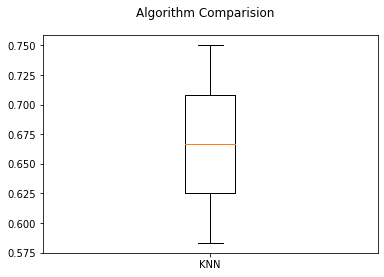

In [31]:
# evaluate each model in turn
from sklearn import model_selection
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=2,random_state=0)
    cv_results = model_selection.cross_val_score(model,X,Y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
#boxplot algorith comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data1=pd.read_csv("diabetes.csv")
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
data1.shape

(768, 9)

In [51]:
from scipy.stats import ttest_ind

In [52]:
df0=data1[data1['Outcome']==0]
df1=data1[data1['Outcome']==1]

In [53]:
df0.shape,df1.shape

((500, 9), (268, 9))

In [56]:
ttest_ind(df0['BloodPressure'],df1['BloodPressure'])

Ttest_indResult(statistic=-1.8047023017353887, pvalue=0.07151390009776082)

#### inference:so we can drop dp(so mean is same)

In [60]:
X=data1.drop(['Outcome','BloodPressure'],axis=1)
Y=data1['Outcome']

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param= {'n_neighbors': np.arange(1,100),'weights':['uniform','distance']}
GS= GridSearchCV(knn,param, cv=5,scoring='roc_auc')
GS.fit(X_std,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             pre_dispat

In [65]:
GS.best_params_

{'n_neighbors': 43, 'weights': 'uniform'}

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
par_dt= {'criterion':["entropy",'gini']}
GS_dt= GridSearchCV(dt,par_dt, cv=5,scoring='roc_auc')
GS_dt.fit(X_std,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [79]:
GS_dt.best_params_

{'criterion': 'gini'}

In [88]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [98]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini',random_state = 0)
RF=RandomForestClassifier(n_estimators=10,random_state=0)
KNN= KNeighborsClassifier(n_neighbors=43,weights='uniform')
NB=GaussianNB()

In [99]:
models=[]
models.append(("LR",LR))
models.append(("FGDT",DT))
models.append(("RF",RF))
models.append(("KNN_UV",KNN_final))
models.append(("NAIVEBAYES",NB))

LR: 0.832025 (0.000519)
FGDT: 0.681276 (0.004153)
RF: 0.805291 (0.000683)
KNN_UV: 0.823786 (0.001244)
NAIVEBAYES: 0.814662 (0.001511)


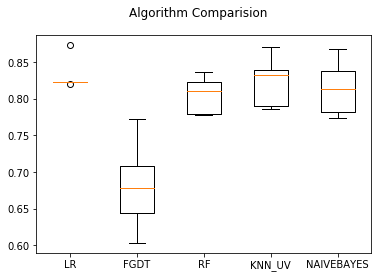

In [100]:
# evaluate each model in turn
from sklearn import model_selection
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results = model_selection.cross_val_score(model,X_std,Y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
#boxplot algorith comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### LOGISTIC IS PERFORMED BETTER I CASE OF BOTH BIAS AND VARIANCE 

##### TUNE RF VALUES FOR BETTER N VALUE